# Banking Term Deposit EDA

In [54]:
#load the required packages
pacman::p_load(pacman, dplyr, ggplot2,plotrix, ggpubr, readr, scales,gridExtra, formattable, repr,ggcorrplot)

In [55]:
# load data
data<-read.table('data/bank-full.csv', sep =";", header = TRUE)

print("Shape of training set")
dim(data)

[1] "Shape of training set"


[1] 45211    17

The full dataset has 45211 observations (bank Customers) and 17 features

In [56]:
head(data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


## Data Definitions (definitions of variables used in analyses)

| # | Feature |What is it? |Type|Example|Comments if any|
|------|------|------|-------|------|------|
|   1  | age| How old|numeric| 20||
|   2  | job|type of job| categorical| admin.,unknown,unemployed,management,...,services||
|   3  | marital| marital status|categorical| married,divorced,single|divorced means divorced or widowed|
|   4  | education| Level of schooling|categorical| unknown,secondary,primary,tertiary||
|   5  | default|  has credit in default? |binary| yes, no||
|   6  | balance| average yearly balance, in euros|numeric| 2143||
|   7  | housing| is the housing on loan?|binary| yes, no||
|   8  | loan| has personal loan?|binary| yes, no|related with the last contact of the current campaign|
|   9  | contact| contact communication type|categorical| unknown,telephone,cellular||
|   10  | day| last contact day of the month|binary| yes, no||
|   11  | month| last contact month of year|Categorical| jan, feb, mar, ..., nov, dec||
|   12  | duration| last contact duration, in seconds|numeric| 23||
|   13  | campaign| number of contacts performed during this campaign and for this client|numeric| 34|includes last contact|
|   14  | pdays| number of days that passed by after the client was last contacted from a previous campaign |numeric| 1|-1 means client was not previously contacted|
|   15  |previous| number of contacts performed before this campaign and for this client|numeric| 0||
|   16  | poutcome| outcome of the previous marketing campaign|categorical| unknown,other,failure,success||
|   17  |y| has the client subscribed a term deposit?| categorical|yes, no|Output variable (desired target)|



In [57]:
#check structure of the data
str(data)
data$day = factor(data$day)
str(data)

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0

The datatypes import to R look alright. We will convert the response variable `y` to numeric for modeling and call it Subscribed.

In [58]:
#Create a new binary column  Subscribed based on y
data<-mutate(data, Subscribed=ifelse(data$y=='no',0,1))
data$Subscribed<-as.factor(data$Subscribed)# convert the Subscribed column to factors
#check structure of the data
print(str(data))
print('_________________________________________________________')
#make a copy of the data and drop y
my_data = data
my_data$y<-NULL
str(my_data)

'data.frame':	45211 obs. of  18 variables:
 $ age       : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job       : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital   : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education : Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance   : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing   : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan      : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact   : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day       : Factor w/ 31 levels "1","2","3","4",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ month     : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration  : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays     : int  -1 -1 -1 

In [59]:
head(my_data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0


In [60]:
# data summary

In [61]:
summary(my_data)

      age                 job           marital          education    
 Min.   :18.00   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:33.00   management :9458   married :27214   secondary:23202  
 Median :39.00   technician :7597   single  :12790   tertiary :13301  
 Mean   :40.94   admin.     :5171                    unknown  : 1857  
 3rd Qu.:48.00   services   :4154                                     
 Max.   :95.00   retired    :2264                                     
                 (Other)    :6835                                     
 default        balance       housing      loan            contact     
 no :44396   Min.   : -8019   no :20081   no :37967   cellular :29285  
 yes:  815   1st Qu.:    72   yes:25130   yes: 7244   telephone: 2906  
             Median :   448                           unknown  :13020  
             Mean   :  1362                                            
             3rd Qu.:  1428                                            


### Missing values are marked as unknown. count number of missing values by column

In [62]:
count_unknown<-function(v){length(v[v=="unknown"])}

unknown <-sapply(my_data, count_unknown)
print('Percentage Missing')
round(100*(unknown/dim(my_data)[1]),2)

[1] "Percentage Missing"


age        job    marital  education    default    balance    housing 
      0.00       0.64       0.00       4.11       0.00       0.00       0.00 
      loan    contact        day      month   duration   campaign      pdays 
      0.00      28.80       0.00       0.00       0.00       0.00       0.00 
  previous   poutcome Subscribed 
      0.00      81.75       0.00

For now missing data is left as it is. poutcome has over 81% of the data missing. I would consider dropping it from the analysis

# Data Visualization

In [63]:
## Categorical Features distribution
options(repr.plot.width=10, repr.plot.height=5)

In [64]:
Categorical_data = my_data[,sapply(my_data,is.factor) ]
numeric_data = my_data[,!sapply(my_data,is.factor) ]

In [65]:
# Categorical Variable

In [66]:
head(Categorical_data, 2)

job,marital,education,default,housing,loan,contact,day,month,poutcome,Subscribed
management,married,tertiary,no,yes,no,unknown,5,may,unknown,0
technician,single,secondary,no,yes,no,unknown,5,may,unknown,0


In [67]:
options(repr.plot.width=10, repr.plot.height=20)

a = ggplot(Categorical_data, aes(job, fill=Subscribed))+ geom_bar(position="fill")
b = ggplot(Categorical_data, aes(marital, fill=Subscribed))+ geom_bar(position="fill")
c = ggplot(Categorical_data, aes(education, fill=Subscribed))+ geom_bar(position="fill")
d = ggplot(Categorical_data, aes(default, fill=Subscribed))+ geom_bar(position="fill")
e = ggplot(Categorical_data, aes(housing, fill=Subscribed))+ geom_bar(position="fill")
f = ggplot(Categorical_data, aes(loan, fill=Subscribed))+ geom_bar(position="fill")
g = ggplot(Categorical_data, aes(contact, fill=Subscribed))+ geom_bar(position="fill")
h = ggplot(Categorical_data, aes(month, fill=Subscribed))+ geom_bar(position="fill")
i = ggplot(Categorical_data, aes(poutcome, fill=Subscribed))+ geom_bar(position="fill")
i = ggplot(Categorical_data, aes(day, fill=Subscribed))+ geom_bar(position="fill")

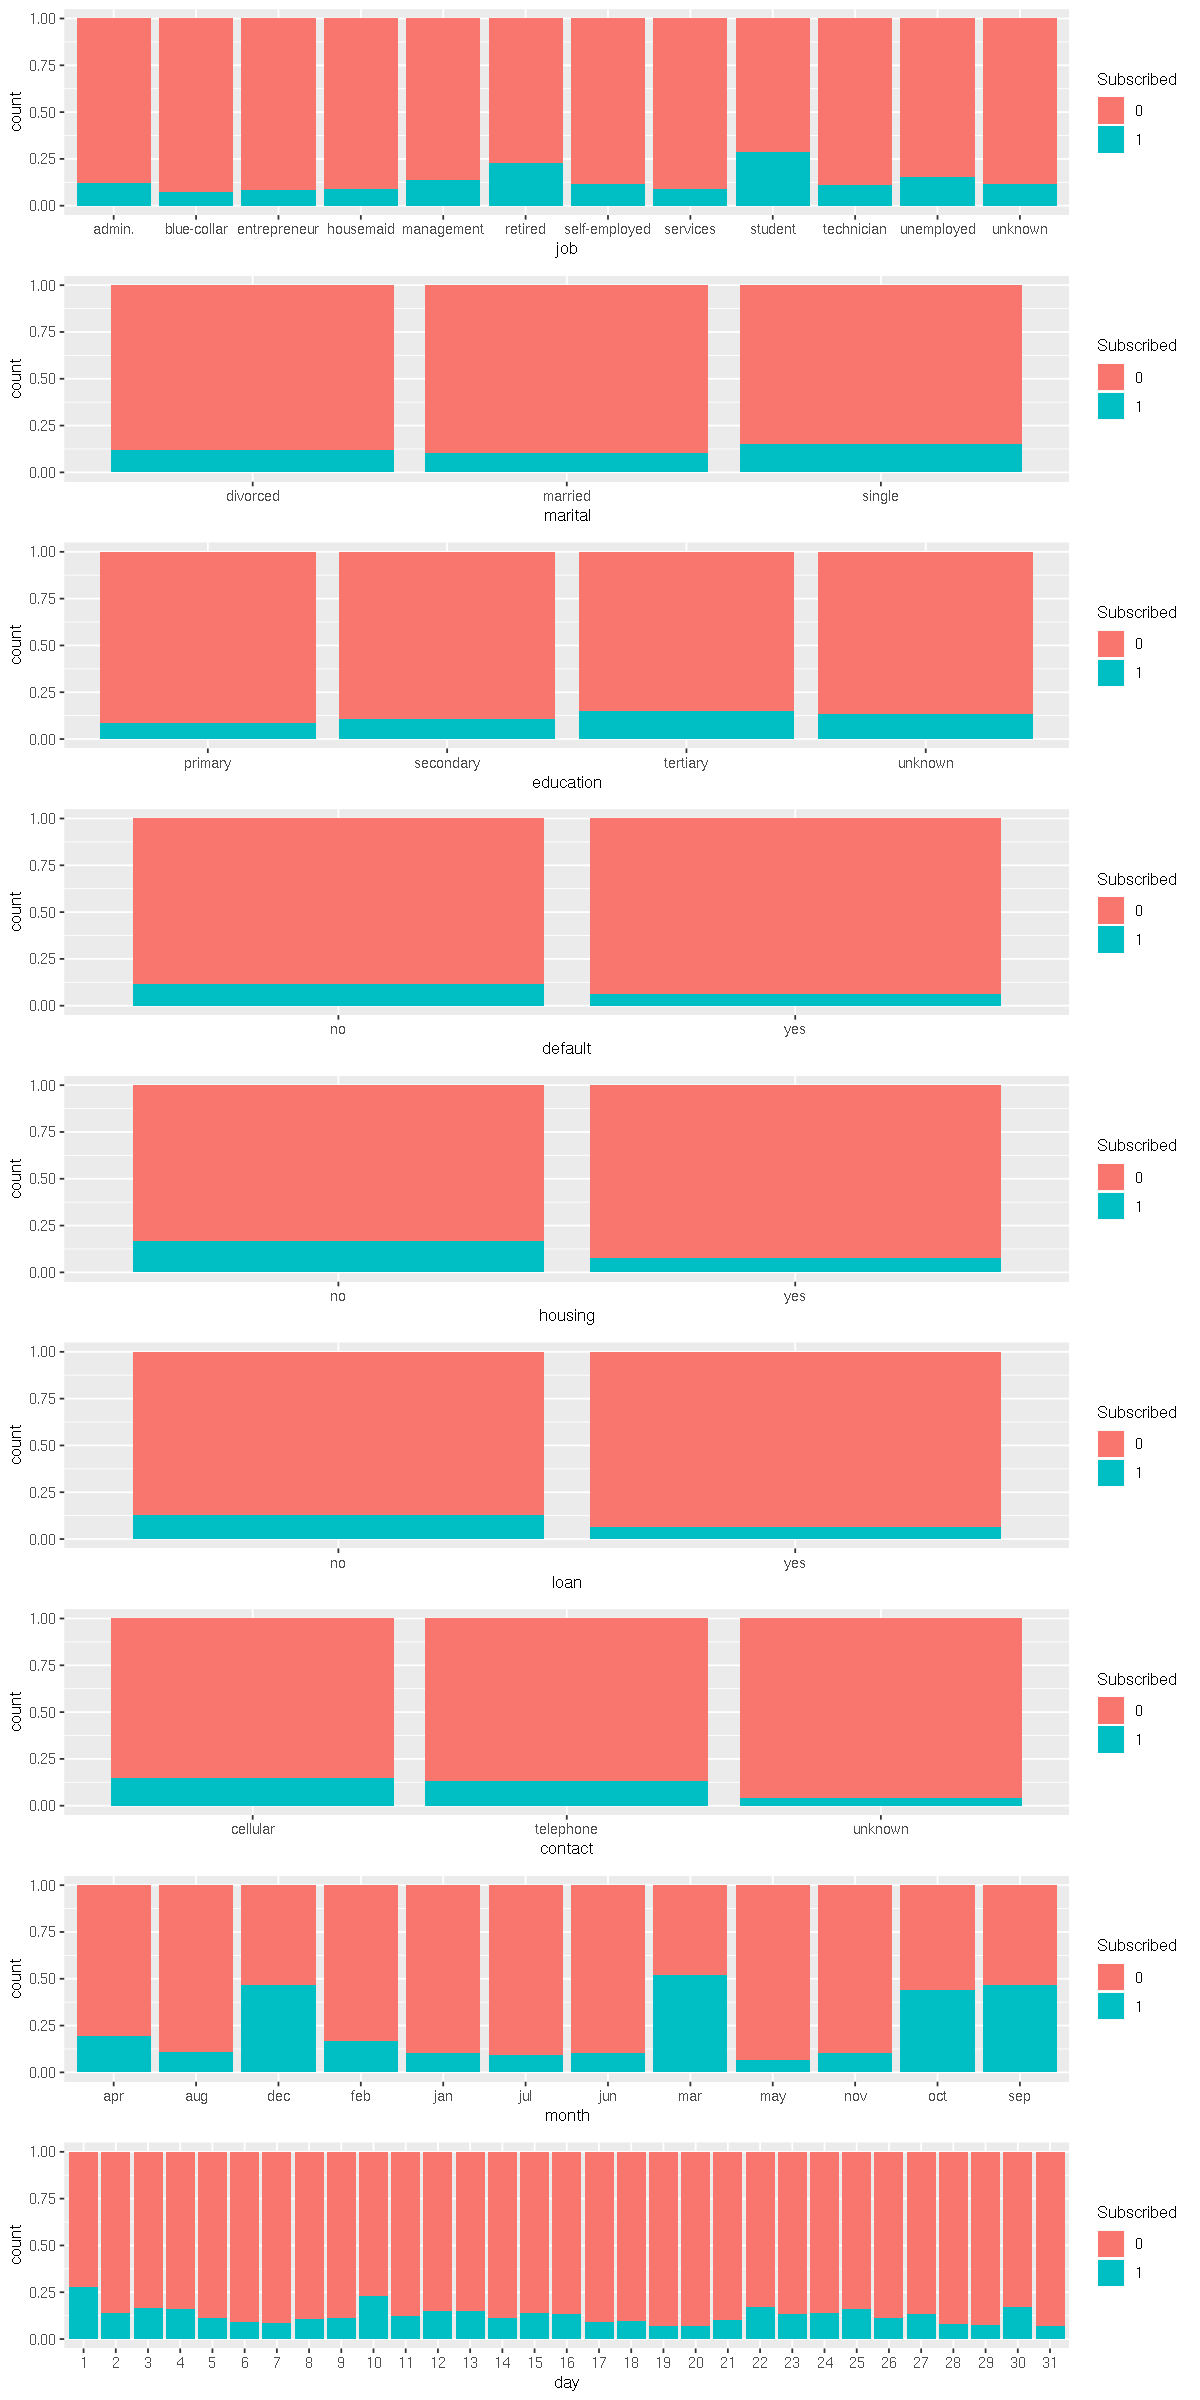

In [68]:
grid.arrange(a, b,c, d, e,f, g,h,i,  ncol=1)

interesting Categorical features from above are `day`, `month`, and `job`

In [69]:
# Continous Variables

In [70]:
head(numeric_data,2)

age,balance,duration,campaign,pdays,previous
58,2143,261,1,-1,0
44,29,151,1,-1,0


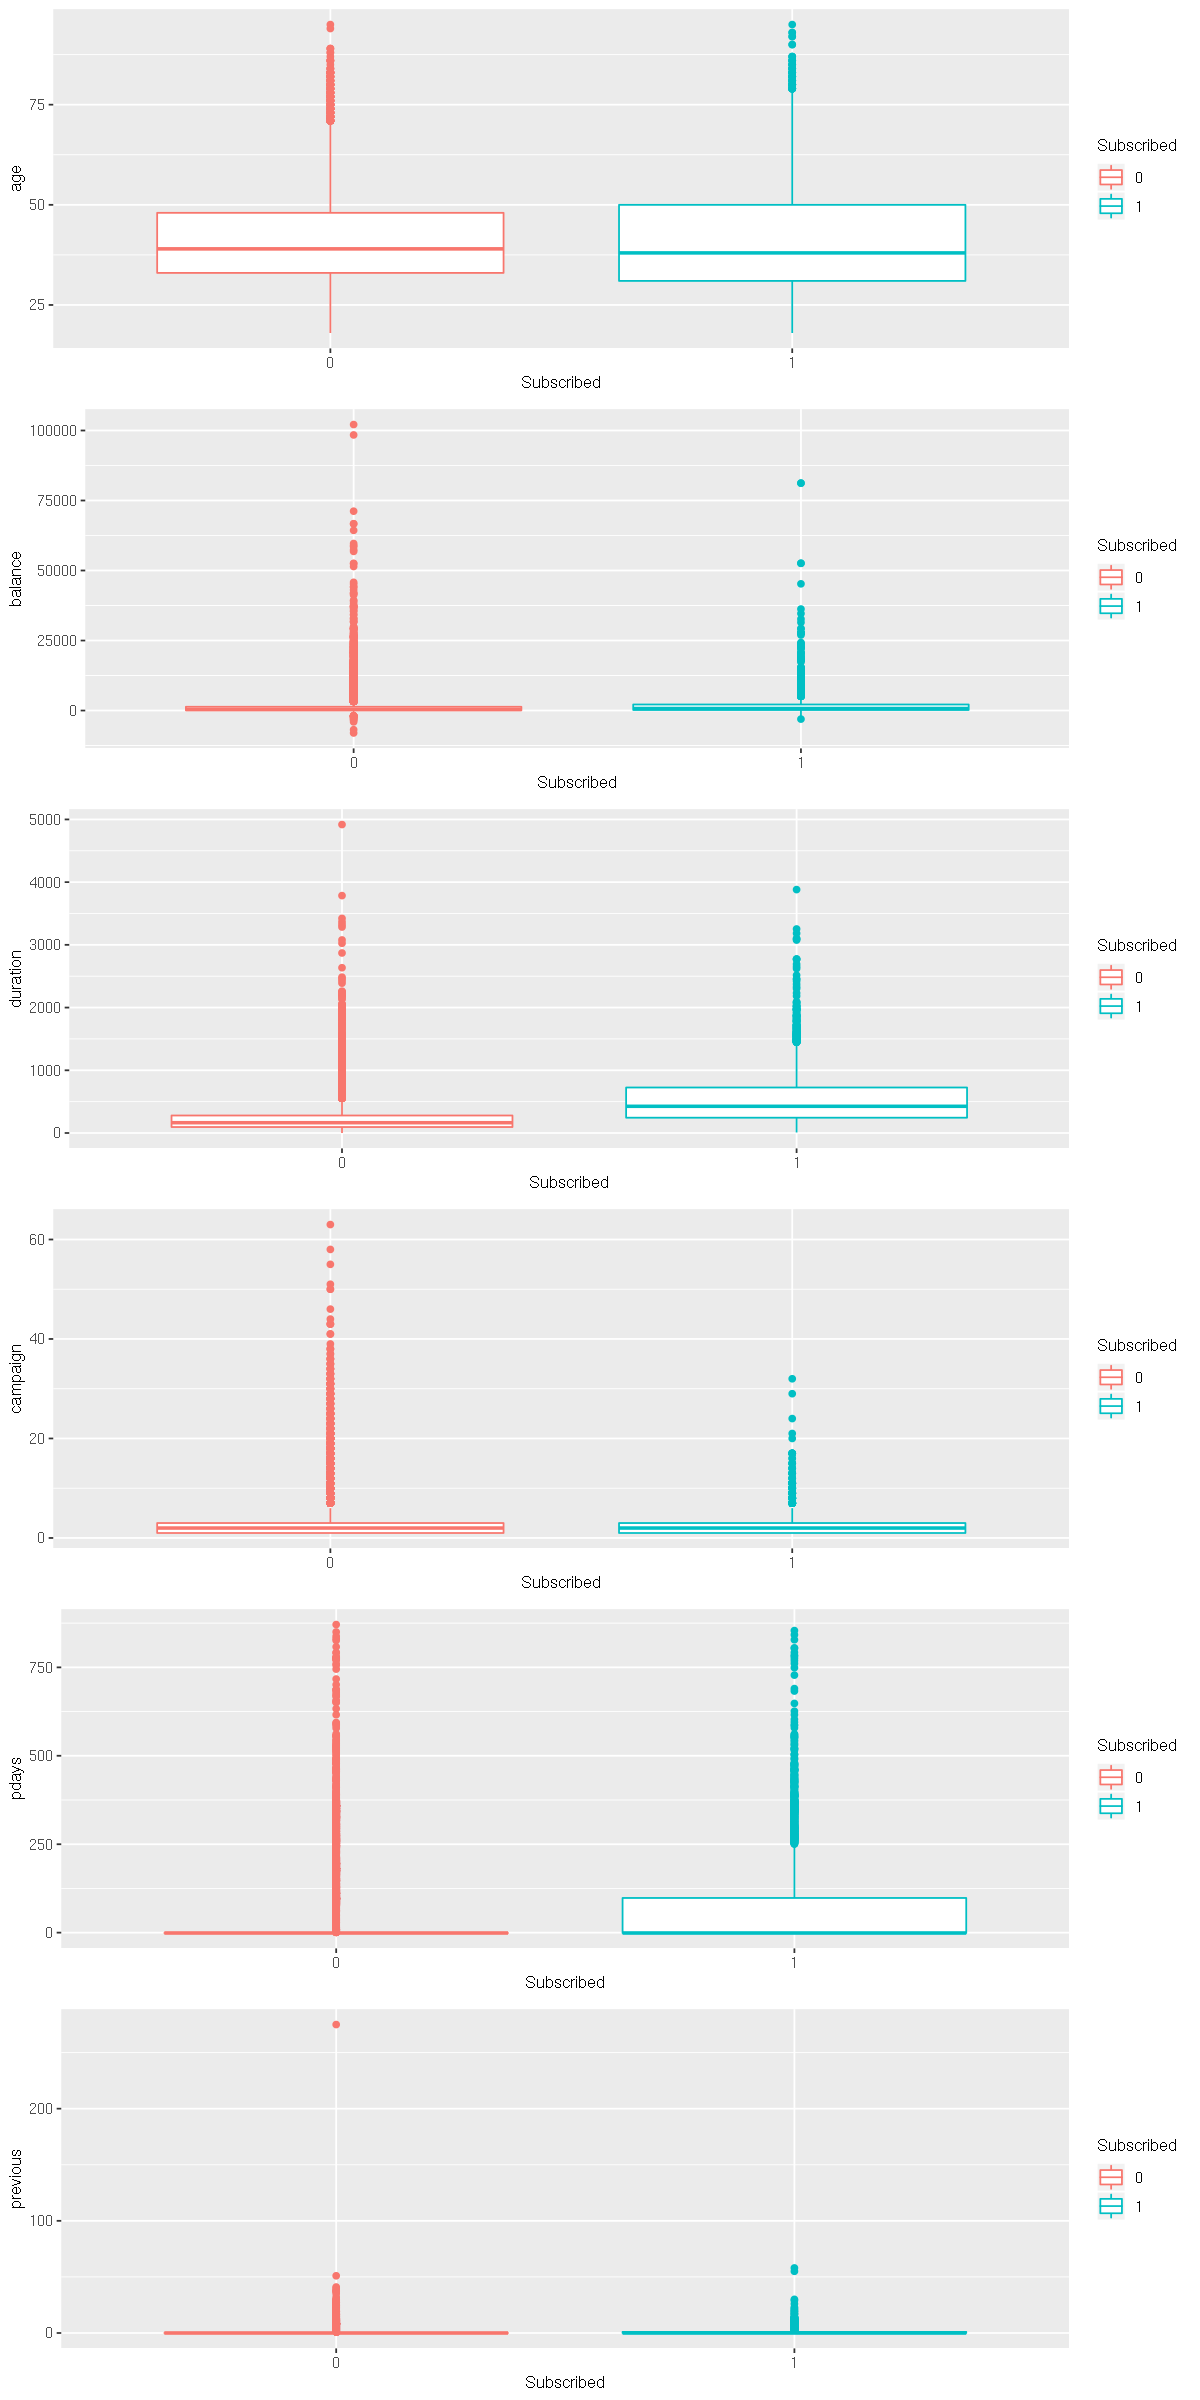

In [71]:
# Change box plot line colors by groups)
m = ggplot(my_data, aes(x=Subscribed, y=age, color=Subscribed))+geom_boxplot()
n= ggplot(my_data, aes(x=Subscribed, y=balance, color=Subscribed))+geom_boxplot()
o= ggplot(my_data, aes(x=Subscribed, y=duration, color=Subscribed))+geom_boxplot()
p= ggplot(my_data, aes(x=Subscribed, y=campaign, color=Subscribed))+geom_boxplot()
q = ggplot(my_data, aes(x=Subscribed, y=pdays, color=Subscribed))+geom_boxplot()
r = ggplot(my_data, aes(x=Subscribed, y=previous, color=Subscribed))+geom_boxplot()
#s = ggplot(my_data, aes(x=previous, fill=Subscribed)) + geom_density(alpha=0.6)

grid.arrange(m,n,o, p, q,r,  ncol=1)

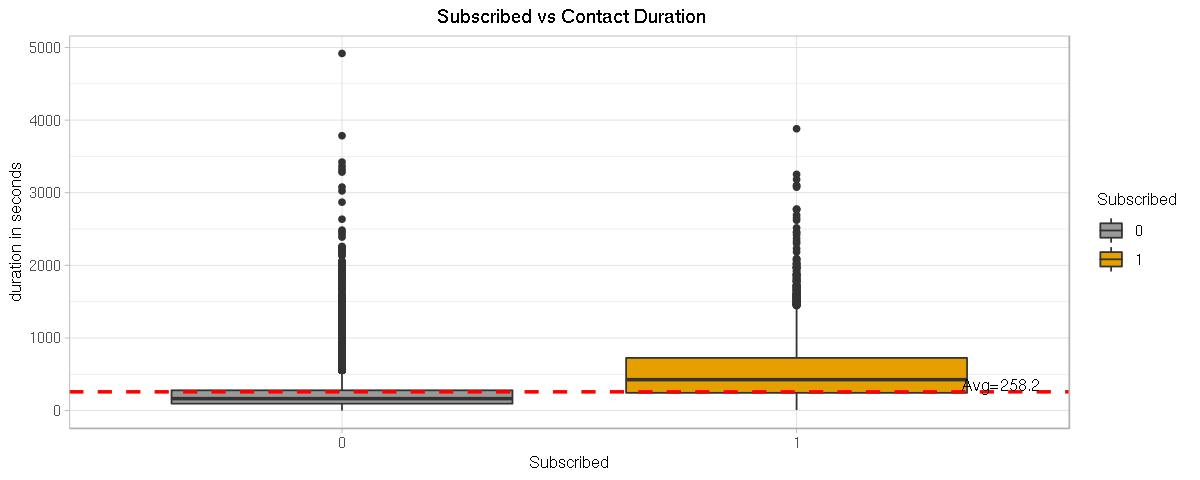

In [72]:
options(repr.plot.width=10, repr.plot.height=4)
avgduration <-mean(my_data$duration)
mean_d <- data.frame( x = c(-Inf, Inf), y = avgduration, mean_d = factor(avgduration) )

ggplot(my_data, aes(y =duration, x = Subscribed, fill = Subscribed)) +
  geom_boxplot()+ theme_light()+labs(title=" Subscribed vs Contact Duration", y = "duration in seconds")+
  theme(plot.title = element_text(hjust = 0.5))+
  geom_hline(yintercept = avgduration, colour="red", linetype="dashed", size=1) +
  annotate("text", 2.45, avgduration+90, label = paste0("Avg=", round(avgduration, 1)), color ="black" )+
  scale_fill_manual(values=c("#999999", "#E69F00"))

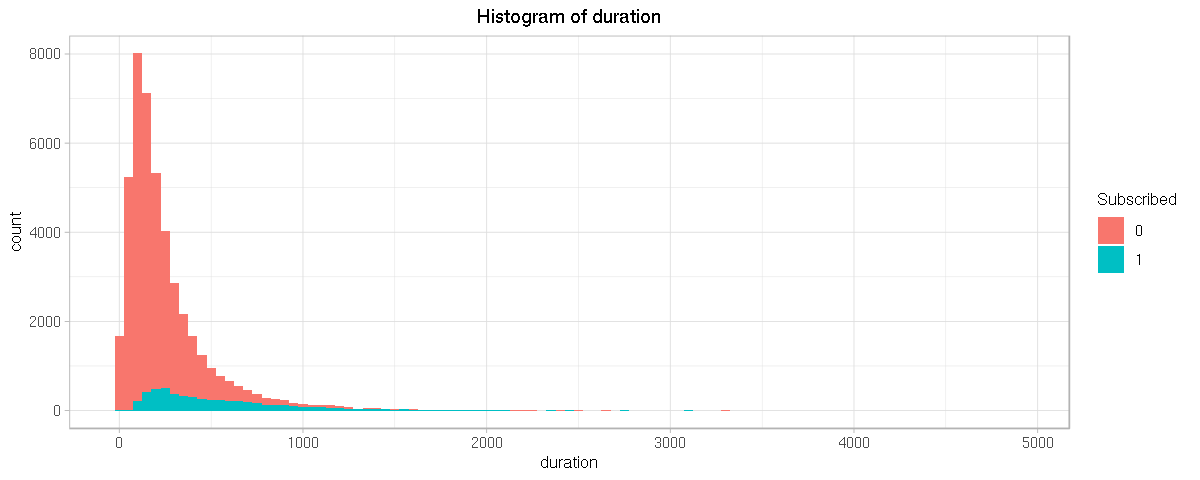

In [73]:
#histrogram of age distrubions color coded by subscription/y
ggplot(my_data, aes(duration, fill = Subscribed)) +
  geom_histogram(binwidth = 50, bins = 1000)+ theme_light()+labs(title="Histogram of duration")+ theme(plot.title = element_text(hjust = 0.5))

In [74]:
#pdays: number of days that passed by after the client was last contacted from a previous campaign 
avgduration <-mean(my_data$pdays)
mean_d <- data.frame( x = c(-Inf, Inf), y = avgduration, mean_d = factor(avgduration) )

D =ggplot(my_data, aes(y =pdays, x = Subscribed, fill = Subscribed)) +
  geom_boxplot()+ theme_light()+labs(title="pdays after last Contact")+ theme(plot.title = element_text(hjust = 0.5))+
  geom_hline(yintercept = avgduration, colour="red", linetype="dashed", size=1) +
  annotate("text", 2.45, avgduration+90, label = paste0("Avg=", round(avgduration, 1)), color ="black" )

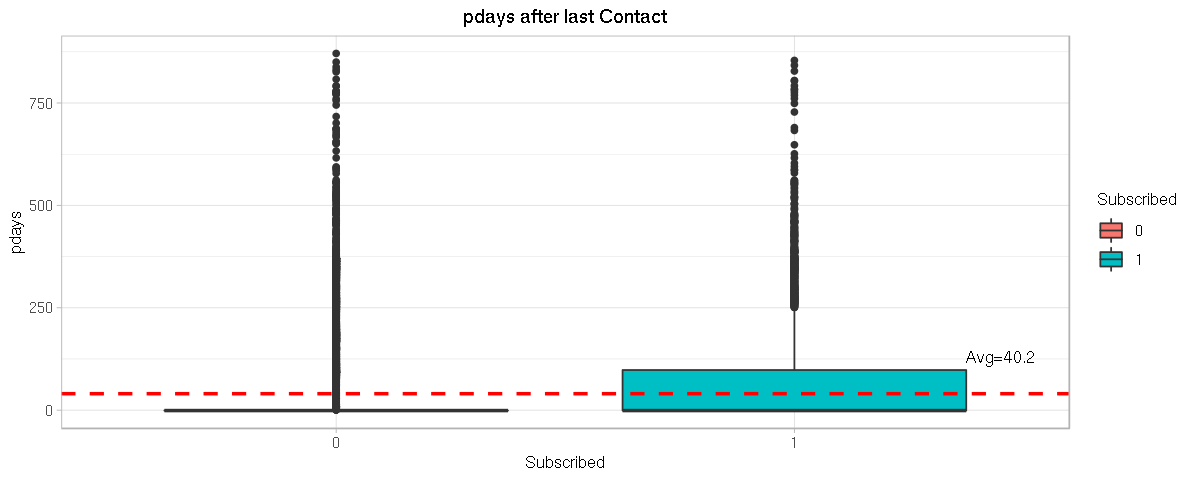

In [75]:
D

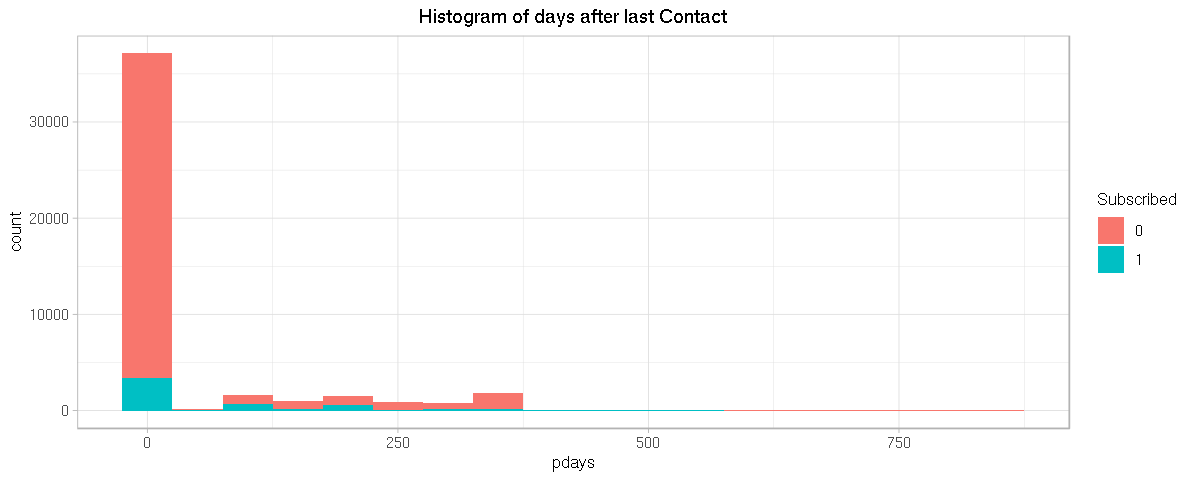

In [76]:
#histrogram of age distrubions color coded by subscription/y
ggplot(my_data, aes(pdays, fill = Subscribed)) +
  geom_histogram(binwidth = 50, bins = 1000)+ theme_light()+labs(title="Histogram of days after last Contact")+ theme(plot.title = element_text(hjust = 0.5))

`pdays` and `duration` stands out at disciminating Subscribed.

### combination plots

In [77]:
names(numeric_data)

[1] "age"      "balance"  "duration" "campaign" "pdays"    "previous"

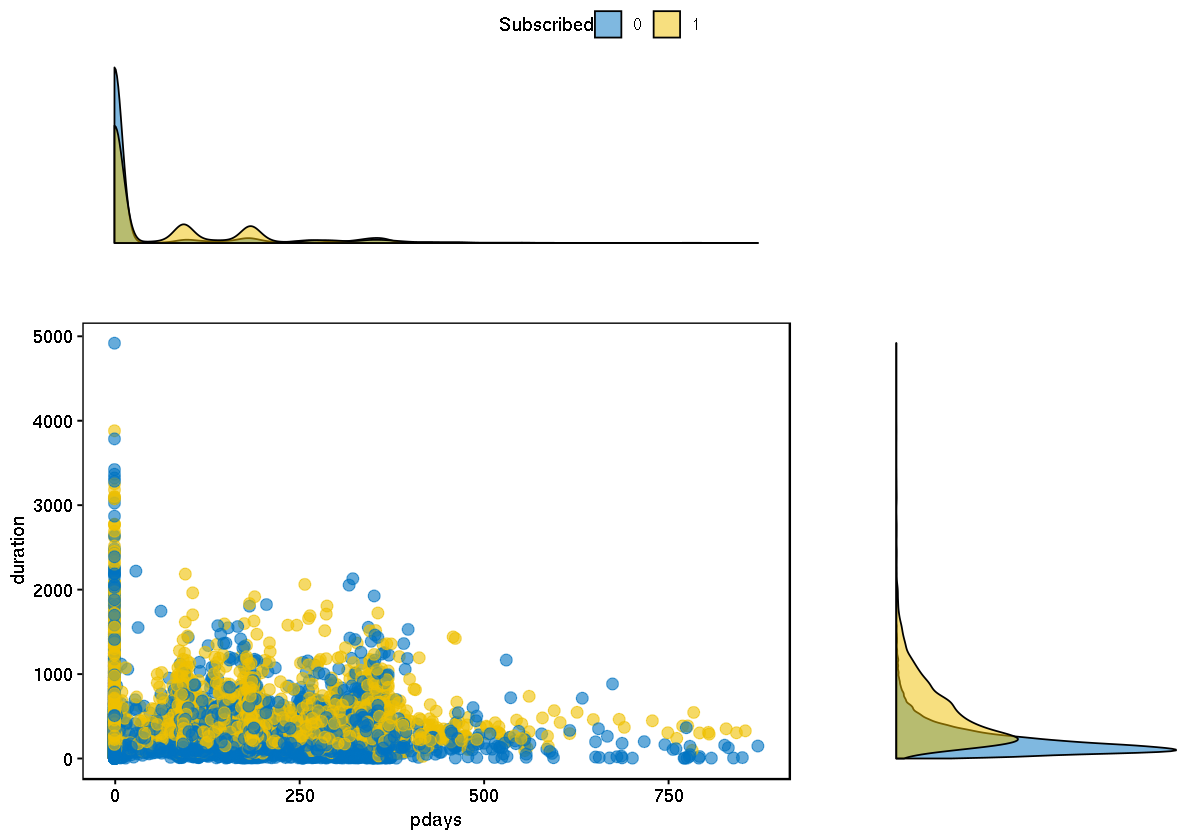

In [78]:
# Scatter plot colored by groups ("Species")
options(repr.plot.width=10, repr.plot.height=7)
sp <- ggscatter(my_data, x = "pdays", y = "duration",
                color = "Subscribed", palette = "jco",
                size = 3, alpha = 0.6)+
  border()                                         
# Marginal density plot of x (top panel) and y (right panel)
xplot <- ggdensity(my_data, "pdays", fill = "Subscribed",
                   palette = "jco")
yplot <- ggdensity(my_data, "duration", fill = "Subscribed", 
                   palette = "jco")+
  rotate()

# Cleaning the plots
yplot <- yplot + clean_theme() 
xplot <- xplot + clean_theme()
# Arranging the plot
ggarrange(xplot, NULL, sp, yplot, 
          ncol = 2, nrow = 2,  align = "hv", 
          widths = c(2, 1), heights = c(1, 2),
          common.legend = TRUE)

In [79]:
# Heatmap

In [80]:
options(repr.plot.width=10, repr.plot.height=6)
corr <- cor(numeric_data)
corr

,age,balance,duration,campaign,pdays,previous
age,1.000000000,0.097782739,-0.004648428,0.004760312,-0.023758014,0.001288319
balance,0.097782739,1.000000000,0.021560380,-0.014578279,0.003435322,0.016673637
duration,-0.004648428,0.021560380,1.000000000,-0.084569503,-0.001564770,0.001203057
campaign,0.004760312,-0.014578279,-0.084569503,1.000000000,-0.088627668,-0.032855290
pdays,-0.023758014,0.003435322,-0.001564770,-0.088627668,1.000000000,0.454819635
previous,0.001288319,0.016673637,0.001203057,-0.032855290,0.454819635,1.000000000


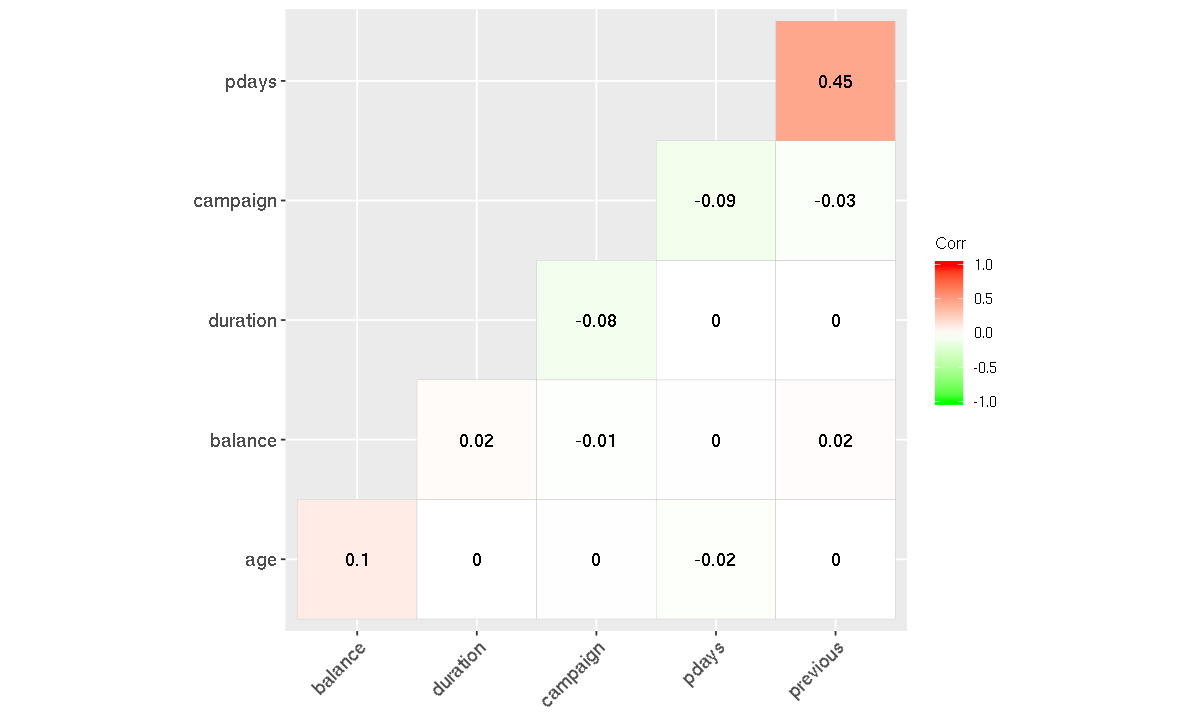

In [81]:
ggcorrplot(corr, type = "lower",
       ggtheme = ggplot2::theme_gray,
   colors = c("green", "white", "red"), lab = TRUE)
detach("package:ggcorrplot")
detach("package:dplyr")

## Engineer new Features

**Potential new Features**
- age group
- Quarter
- Week of year
- Week of Month

### Age_Group from age

In [82]:
pacman::p_load(dplyr)
#creating a new varible agegroup
options(repr.plot.width=10, repr.plot.height=5)
# agegroups = 19-20, 30-45, 45-65, 65++
my_data$Age_Group <- cut(my_data$age, c(-Inf, 20, 30, 45, 65, Inf))

# Name the levels of 'Age_Group' for readability
levels(my_data$Age_Group) <- c("<20","20-30", "31-45", "46-64", "65+")
tail(my_data,10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed,Age_Group
45202,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,1,46-64
45203,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1,31-45
45204,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1,20-30
45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1,65+
45206,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1,20-30
45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,46-64
45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,65+
45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,65+
45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,46-64
45211,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0,31-45


In [83]:
#count by age group
my_data%>%
  group_by(Age_Group)%>%
  summarise(Count = n())

Age_Group,Count
<20,97
20-30,6933
31-45,23733
46-64,13697
65+,751


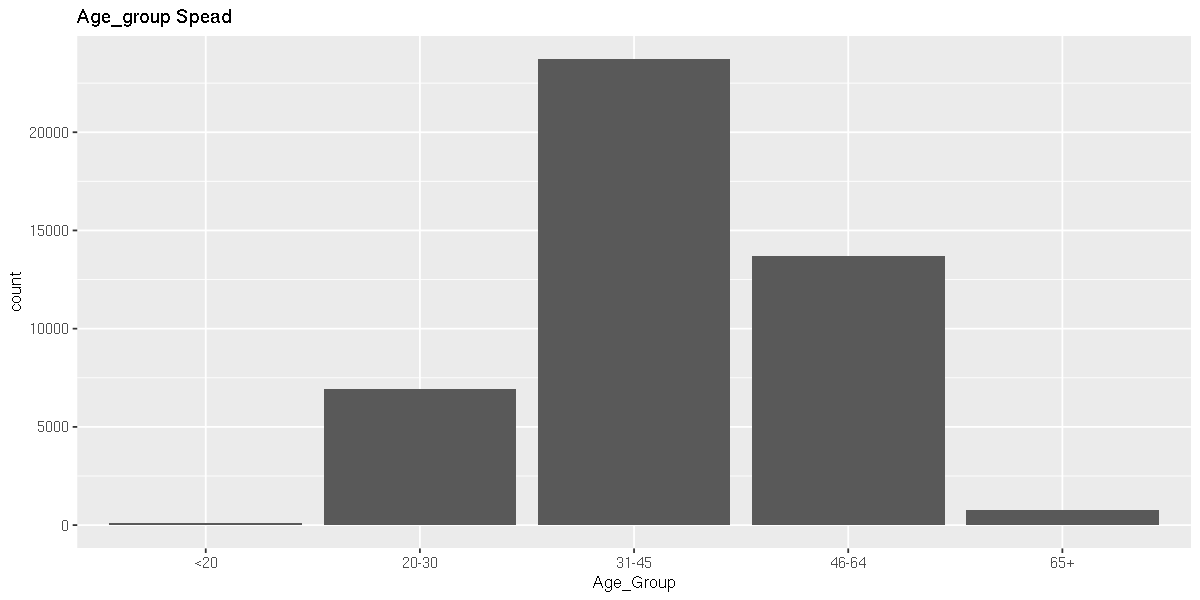

In [84]:
# Age rgoups Spread
ggplot(my_data, aes(x=Age_Group)) +
  geom_bar(position = "dodge")+stat_count(mapping=aes(x=Age_Group,y=..prop..))+labs(title = "Age_group Spead")

In [85]:
Age_group.Stats <- my_data%>%
  group_by(Age_Group, Subscribed) %>%
  summarize(Number = n())%>%transmute(Subscribed,Number,percentage = round(100*Number/sum(Number), 2))

In [86]:
data.frame(Age_group.Stats)

Age_Group,Subscribed,Number,percentage
<20,0,64,65.98
<20,1,33,34.02
20-30,0,5821,83.96
20-30,1,1112,16.04
31-45,0,21388,90.12
31-45,1,2345,9.88
46-64,0,12218,89.20
46-64,1,1479,10.80
65+,0,431,57.39
65+,1,320,42.61


### Quarters

In [87]:
#create a new variable Quarters a derivative of months listing the four quarters in a year

# Quarter = Q1, Q2, Q3, Q4

my_data<-mutate(my_data,Quarter=ifelse(my_data$month =='jan'|my_data$month =='feb'|my_data$month =='mar','Q1',
                              ifelse(my_data$month =='apr'|my_data$month =='may'|my_data$month =='jun','Q2',
                                     ifelse(my_data$month =='jul'|my_data$month =='aug'|my_data$month =='sep','Q3',
                                            ifelse(my_data$month =='oct'|my_data$month =='nov'|my_data$month =='dec','Q4','NA')))))


my_data$Quarter<-as.factor(my_data$Quarter)
head(my_data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed,Age_Group,Quarter
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,46-64,Q2
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,31-45,Q2
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,31-45,Q2
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,46-64,Q2
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,31-45,Q2
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0,31-45,Q2


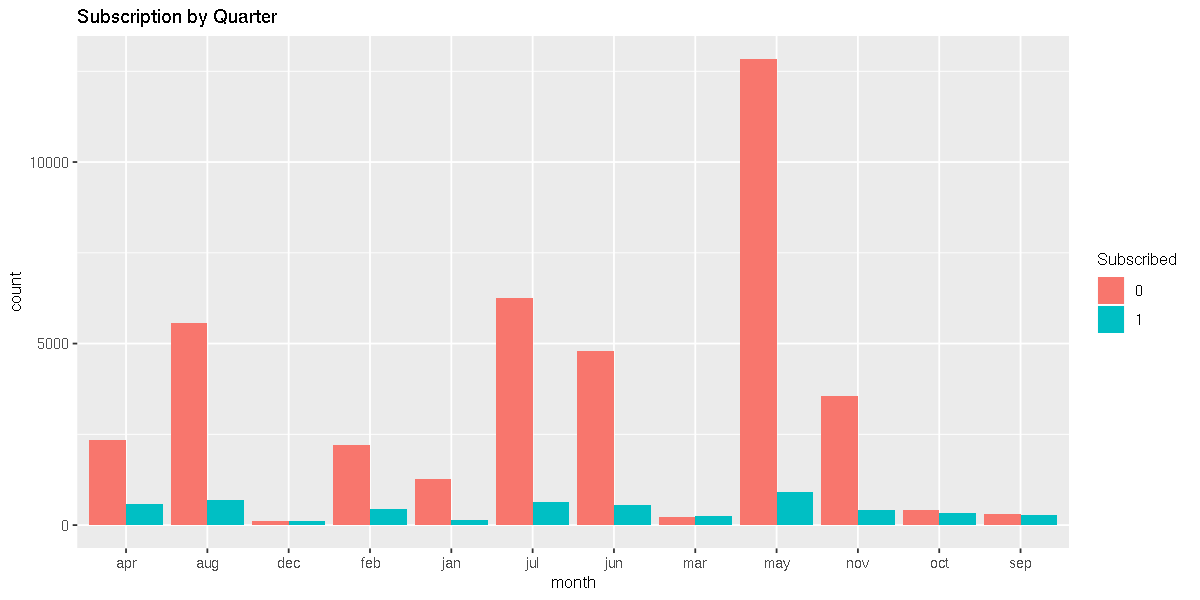

In [88]:
#subscription by Quarter
month = factor(my_data$month , levels = month.abb)
#print(month)
ggplot(my_data, aes(x=month,fill=Subscribed)) +
  geom_bar(position = "dodge")+stat_count(mapping=aes(x=month,y=..prop..))+labs(title = "Subscription by Quarter")# + coord_flip()

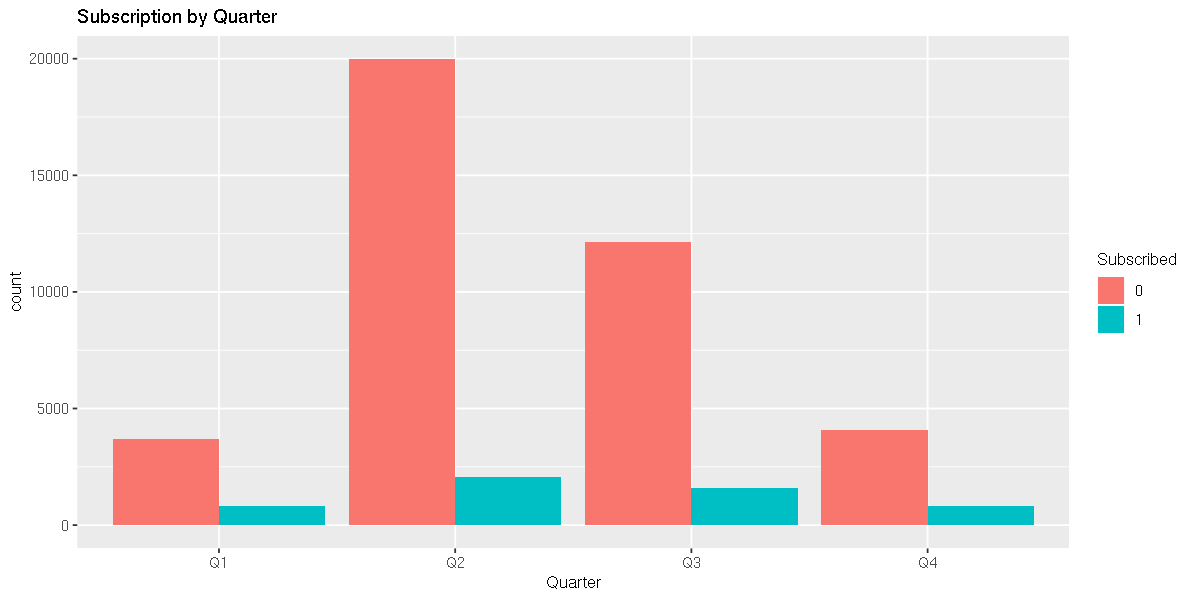

In [89]:
#subscription by Quarter
ggplot(my_data, aes(x=Quarter,fill=Subscribed)) +
  geom_bar(position = "dodge")+stat_count(mapping=aes(x=Quarter,y=..prop..))+labs(title = "Subscription by Quarter")# + coord_flip()

In [90]:
#print stats table
Quarter.Stats <- my_data%>%
  group_by(Quarter, Subscribed) %>%
  summarize(Number = n())%>%transmute(Subscribed,Number,percentage = round(100*Number/sum(Number), 2))

In [91]:
data.frame(Quarter.Stats)

Quarter,Subscribed,Number,percentage
Q1,0,3698,81.65
Q1,1,831,18.35
Q2,0,19991,90.71
Q2,1,2048,9.29
Q3,0,12137,88.46
Q3,1,1584,11.54
Q4,0,4096,83.22
Q4,1,826,16.78


In [92]:
summary<-my_data%>%
select(Subscribed,Quarter,Subscribed,education, balance, campaign)%>%
group_by(Subscribed,Quarter,Subscribed,education)%>%
summarise(freq = n(),
         contacts =mean(campaign),
         MedianBalance =median(balance))

In [93]:
summary


Subscribed,Quarter,education,freq,contacts,MedianBalance
0,Q1,primary,461,2.208243,491.0
0,Q1,secondary,1873,2.193807,420.0
0,Q1,tertiary,1190,2.159664,505.5
0,Q1,unknown,174,2.333333,587.5
0,Q2,primary,3650,2.735616,391.0
0,Q2,secondary,11069,2.530852,369.0
0,Q2,tertiary,4381,2.615613,556.0
0,Q2,unknown,891,2.789001,454.0
0,Q3,primary,1660,3.714458,258.0
0,Q3,secondary,5874,3.699523,267.5


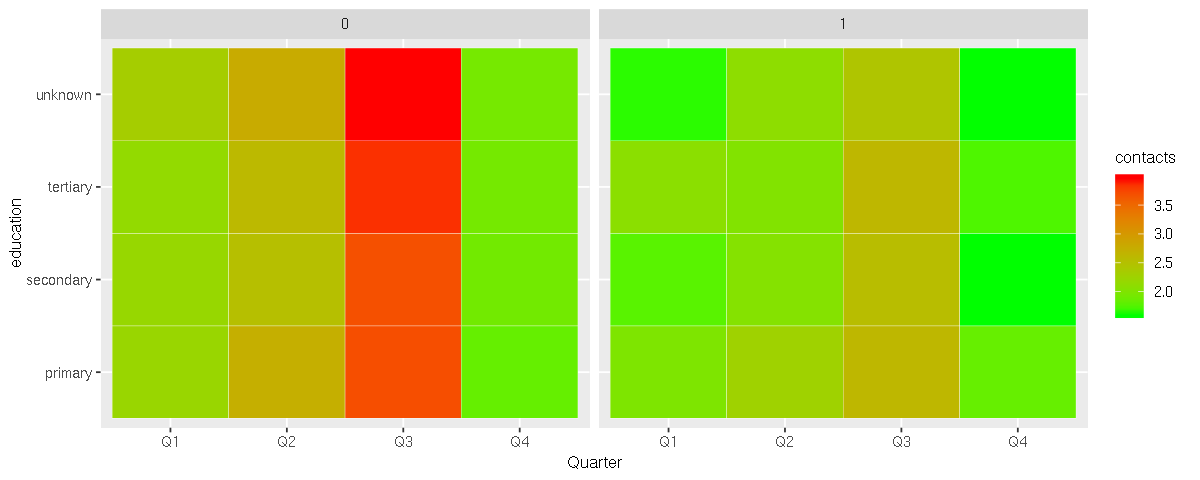

In [94]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(summary, aes(Quarter,education, fill = contacts)) + 
  geom_tile(colour = "white") + 
  facet_grid(~Subscribed)+ 
  scale_fill_gradient(low="green", high="red")

In [95]:
summary2<-my_data%>%
select(Subscribed,marital,Subscribed,education, balance, campaign)%>%
group_by(Subscribed,marital,Subscribed,education)%>%
summarise(freq = n(),
         contacts =mean(campaign),
         MedianBalance =median(balance))

In [96]:
head(my_data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed,Age_Group,Quarter
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,46-64,Q2
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,31-45,Q2
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,31-45,Q2
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,46-64,Q2
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,31-45,Q2
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0,31-45,Q2


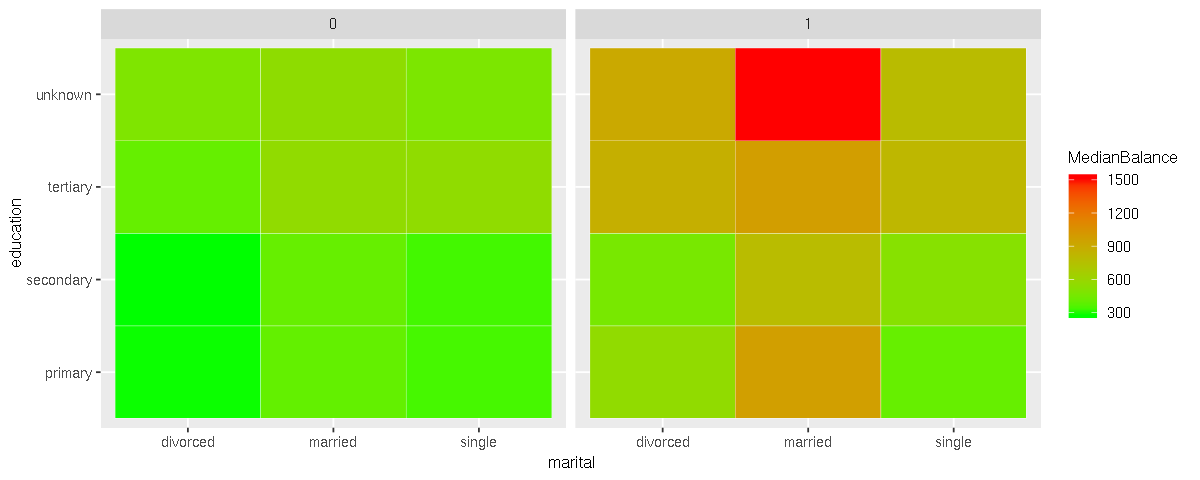

In [97]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(summary2, aes(marital,education, fill = MedianBalance)) + 
  geom_tile(colour = "white") + 
  facet_grid(~Subscribed)+ 
  scale_fill_gradient(low="green", high="red")

In [ ]:
#save  data for modeling

In [98]:
head(my_data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed,Age_Group,Quarter
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,46-64,Q2
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,31-45,Q2
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,31-45,Q2
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,46-64,Q2
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,31-45,Q2
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0,31-45,Q2


In [102]:
write.csv(my_data, 'data/modeling.csv', row.names = FALSE)